In [41]:
import pandas as pd

In [42]:
df = pd.read_csv('./data-midterm.csv')
df

,TimeToPlay,TimeToStudy,ProfessionalScore,InterviewScore,Sexuality,ExpectedSalary,SocialNetworkingTimeUse,Result
0,0.1,4.4,2.5,F,T,249.6,Much,NO
1,4.1,5.7,3.7,D,L,114.6,Pretty,YES
2,7.3,0.9,2.7,D,T,862.0,Almost,NO
3,6.2,8.8,2.7,D,T,147.2,Almost,YES
4,5.0,3.1,0.2,D,Q,653.4,Pretty,NO
...,...,...,...,...,...,...,...,...
995,2.9,6.3,1.2,C,Q,512.1,Almost,YES
996,3.8,1.5,2.8,B,T,267.6,Almost,NO
997,7.4,0.6,1.3,D,Q,884.2,NaN,YES
998,8.5,5.7,3.3,C,L,662.2,Pretty,YES


In [44]:
# Giả sử bạn đã có df với cột ProfessionalScore
# Tìm giá trị min và max của cột ProfessionalScore
min_value = df['ProfessionalScore'].min()
max_value = df['ProfessionalScore'].max()

# Giá trị đã được scale là 0.65
scaled_value = 0.65

# Tính giá trị ban đầu (original_value)
original_value = min_value + (scaled_value * (max_value - min_value))

# Hiển thị giá trị ban đầu
print(f"Giá trị ban đầu của 0.65 sau khi scale là: {original_value}")


Giá trị ban đầu của 0.65 sau khi scale là: 2.6


In [46]:
import pandas as pd

# Đọc dữ liệu vào DataFrame (ví dụ nếu bạn đang đọc từ một file CSV)

# Sau đó kiểm tra loại dữ liệu và giá trị của ExpectedSalary
expected_salary_dtype = df['ExpectedSalary'].dtype
expected_salary_description = df['ExpectedSalary'].describe()

print(f"Loại dữ liệu của ExpectedSalary: {expected_salary_dtype}")
print(f"Mô tả thống kê của ExpectedSalary: \n{expected_salary_description}")


Loại dữ liệu của ExpectedSalary: float64
Mô tả thống kê của ExpectedSalary: 
count    1000.000000
mean      549.826700
std       263.479774
min       102.100000
25%       321.775000
50%       546.300000
75%       787.700000
max       999.900000
Name: ExpectedSalary, dtype: float64


<Figure size 1000x600 with 0 Axes>

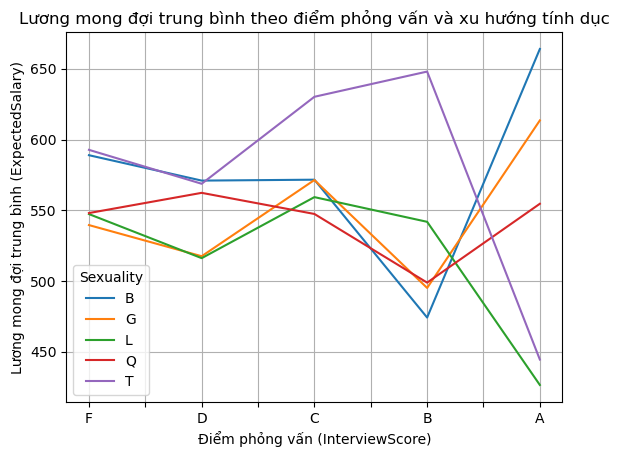

In [48]:
# Đặt lại thứ tự của InterviewScore nếu cần
df['InterviewScore'] = pd.Categorical(df['InterviewScore'], categories=['F', 'D', 'C', 'B', 'A'], ordered=True)

# Tính lương mong đợi trung bình theo nhóm InterviewScore và Sexuality
grouped_data = df.groupby(['InterviewScore', 'Sexuality'])['ExpectedSalary'].mean().unstack()

# Vẽ biểu đồ line
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='line')

# Thêm tiêu đề và nhãn
plt.title('Lương mong đợi trung bình theo điểm phỏng vấn và xu hướng tính dục')
plt.xlabel('Điểm phỏng vấn (InterviewScore)')
plt.ylabel('Lương mong đợi trung bình (ExpectedSalary)')

# Hiển thị chú thích và biểu đồ
plt.legend(title='Sexuality')
plt.grid(True)
plt.show()


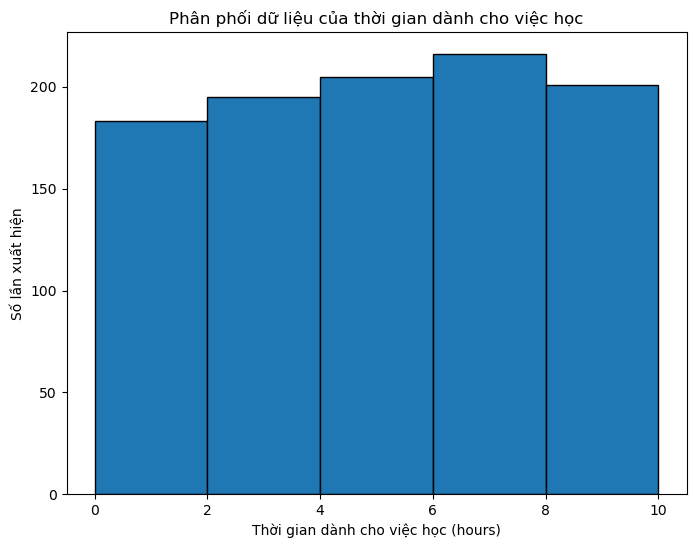

In [45]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ histogram với số lượng bin là 5
plt.figure(figsize=(8, 6))
plt.hist(df['TimeToStudy'], bins=5, edgecolor='black')

# Thêm tiêu đề và nhãn cho trục
plt.title('Phân phối dữ liệu của thời gian dành cho việc học')
plt.xlabel('Thời gian dành cho việc học (hours)')
plt.ylabel('Số lần xuất hiện')

# Hiển thị biểu đồ
plt.show()


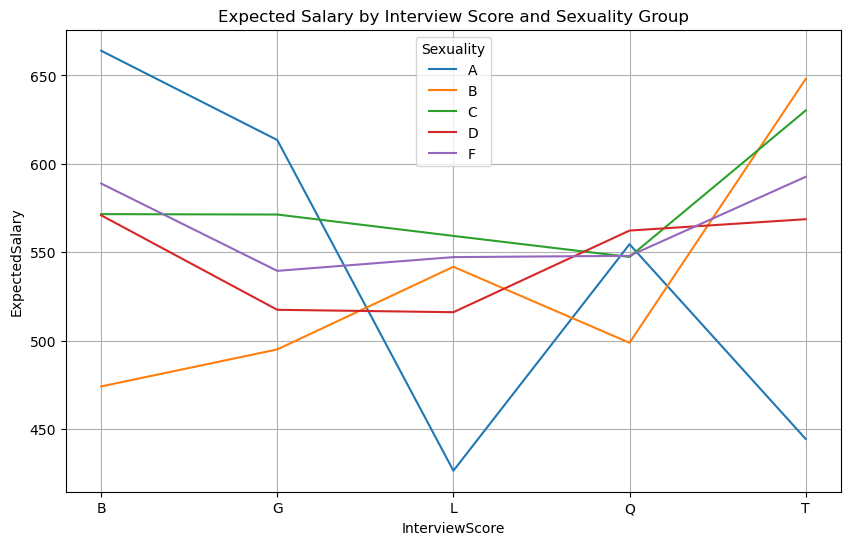

In [43]:
# Tạo DataFrame
import pandas as pd
import matplotlib.pyplot as plt
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Sử dụng GroupBy để lấy giá trị trung bình theo nhóm
grouped = df.groupby(['Sexuality', 'InterviewScore'])['ExpectedSalary'].mean().unstack()

# Vẽ các đường cho từng nhóm Sexuality
for column in grouped.columns:
    plt.plot(grouped.index, grouped[column], label=column)

# Thêm tiêu đề và nhãn
plt.title('Expected Salary by Interview Score and Sexuality Group')
plt.xlabel('InterviewScore')
plt.ylabel('ExpectedSalary')
plt.legend(title='Sexuality')
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

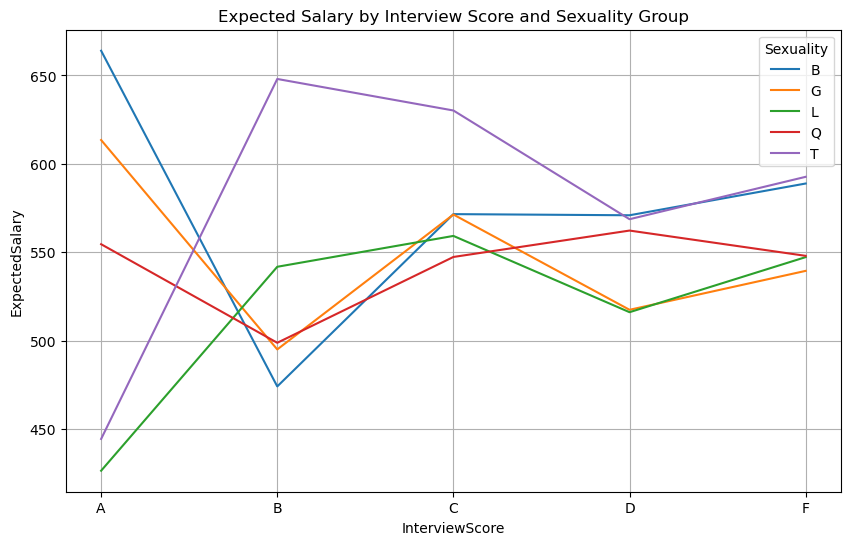

In [6]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Sử dụng GroupBy để lấy giá trị trung bình của ExpectedSalary theo nhóm InterviewScore và Sexuality
grouped = df.groupby(['InterviewScore', 'Sexuality'])['ExpectedSalary'].mean().unstack()

# Vẽ các đường cho từng nhóm Sexuality
for column in grouped.columns:
    plt.plot(grouped.index, grouped[column], label=column)

# Thêm tiêu đề và nhãn
plt.title('Expected Salary by Interview Score and Sexuality Group')
plt.xlabel('InterviewScore')
plt.ylabel('ExpectedSalary')
plt.legend(title='Sexuality')
plt.grid(True)

# Hiển thị biểu đồ
plt.show()


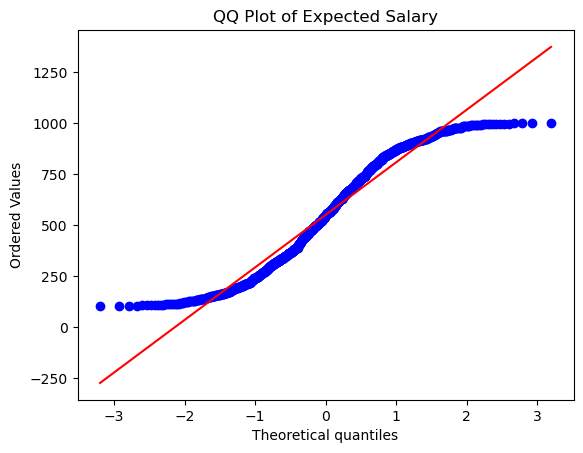

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Giả sử bạn có biến 'ExpectedSalary' trong dataframe của bạn (df)
data = df['ExpectedSalary']

# Vẽ QQ Plot
stats.probplot(data, dist="norm", plot=plt)
plt.title('QQ Plot of Expected Salary')
plt.show()


In [8]:
import scipy.stats as stats

# Giả sử bạn đã có df với cột TimeToStudy và TimeToPlay
# Thực hiện kiểm định t-test cho hai biến TimeToStudy và TimeToPlay

# Kiểm định t-test hai mẫu ghép cặp
t_stat, p_value = stats.ttest_rel(df['TimeToStudy'], df['TimeToPlay'])

# Kết quả
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -0.10555452694440287, P-value: 0.9159569952699564


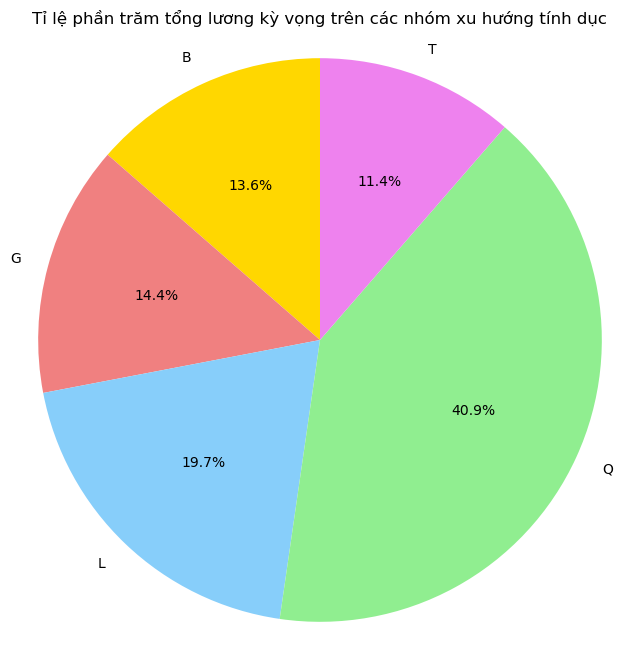

Sexuality
B    13.581516
G    14.426546
L    19.706682
Q    40.905434
T    11.379822
Name: ExpectedSalary, dtype: float64


In [9]:
import matplotlib.pyplot as plt

# Tính tổng lương kỳ vọng theo nhóm xu hướng tính dục
grouped_sexuality = df.groupby('Sexuality')['ExpectedSalary'].sum()

# Tính tổng số lương
total_salary = grouped_sexuality.sum()

# Tính phần trăm cho từng nhóm
percentages = (grouped_sexuality / total_salary) * 100

# Vẽ biểu đồ Pie
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=grouped_sexuality.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'violet'])
plt.title('Tỉ lệ phần trăm tổng lương kỳ vọng trên các nhóm xu hướng tính dục')
plt.axis('equal')  # Đảm bảo biểu đồ hình tròn
plt.show()

# In ra tỉ lệ phần trăm
print(percentages)


In [11]:
import pandas as pd
import scipy.stats as stats

# Tạo bảng chéo giữa Sexuality và ProfessionalScore
contingency_table = pd.crosstab(df['Sexuality'], df['ProfessionalScore'])

# Thực hiện kiểm định chi-square
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Kết quả
print(f"Chi-square statistic: {chi2_stat}, p-value: {p_val}")


Chi-square statistic: 194.70593626695208, p-value: 0.03201730238177916


In [12]:
# Tính điểm trung bình của ProfessionalScore trên từng nhóm InterviewScore
mean_scores = df.groupby('InterviewScore')['ProfessionalScore'].mean()

# Hiển thị kết quả
print(mean_scores)


InterviewScore
A    1.911364
B    1.993125
C    1.954983
D    1.885811
F    1.959809
Name: ProfessionalScore, dtype: float64


In [13]:
# Tính phân vị 90% của TimeToStudy
percentile_90 = df['TimeToStudy'].quantile(0.90)

# Hiển thị kết quả
print(f"10% số lượng sinh viên có thời gian học lớn hơn: {percentile_90}")



10% số lượng sinh viên có thời gian học lớn hơn: 8.9


In [14]:
from sklearn.linear_model import LinearRegression

# Chuẩn bị dữ liệu đầu vào cho mô hình hồi quy
X = df[['TimeToPlay', 'TimeToStudy']]  # Biến độc lập: Thời gian nghỉ và thời gian tự học
y = df['ProfessionalScore']  # Biến phụ thuộc: Điểm đánh giá năng lực

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X, y)

# Lấy hệ số tự do (intercept)
intercept = model.intercept_

# Hiển thị kết quả
print(f"Intercept (Hệ số tự do): {intercept}")


Intercept (Hệ số tự do): 1.813415695603688


In [15]:
# Tính Skewness của TimeToStudy
skewness = df['TimeToStudy'].skew()

# Hiển thị kết quả
print(f"Skewness (Độ lệch): {skewness}")


Skewness (Độ lệch): -0.07042972912340169


In [ ]:
# Lọc các nhóm đạt phỏng vấn (giả sử cột 'Result' có giá trị 'YES' biểu thị đạt phỏng vấn)
filtered_df = df[df['Result'] == 'YES']

# Tính tổng thời gian tự học theo nhóm xu hướng tính dục
grouped_study_time = filtered_df.groupby('Sexuality')['TimeToStudy'].sum()

# Hiển thị kết quả
print(grouped_study_time)

# Vẽ biểu đồ cột để minh họa
import matplotlib.pyplot as plt

grouped_study_time.plot(kind='bar', color='skyblue')
plt.title('Tổng thời gian tự học theo nhóm xu hướng tính dục (Nhóm đạt phỏng vấn)')
plt.xlabel('Xu hướng tính dục')
plt.ylabel('Tổng thời gian tự học')
plt.show()


Sexuality
B     330.2
G     384.7
L     524.6
Q    1049.0
T     206.4
Name: TimeToStudy, dtype: float64


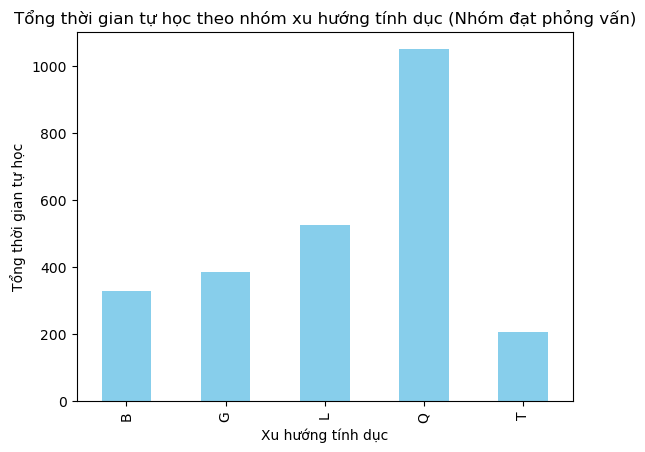

In [16]:
# Lọc các nhóm đạt phỏng vấn (giả sử cột 'Result' có giá trị 'YES' biểu thị đạt phỏng vấn)
filtered_df = df[df['Result'] == 'YES']

# Tính tổng thời gian tự học theo nhóm xu hướng tính dục
grouped_study_time = filtered_df.groupby('Sexuality')['TimeToStudy'].sum()

# Hiển thị kết quả
print(grouped_study_time)

# Vẽ biểu đồ cột để minh họa
import matplotlib.pyplot as plt

grouped_study_time.plot(kind='bar', color='skyblue')
plt.title('Tổng thời gian tự học theo nhóm xu hướng tính dục (Nhóm đạt phỏng vấn)')
plt.xlabel('Xu hướng tính dục')
plt.ylabel('Tổng thời gian tự học')
plt.show()


In [17]:
# Tính các phân vị Q1 (25%) và Q3 (75%) cho điểm đánh giá năng lực
Q1 = df['ProfessionalScore'].quantile(0.25)
Q3 = df['ProfessionalScore'].quantile(0.75)

# Tính khoảng IQR
IQR = Q3 - Q1

# Hiển thị kết quả
print(f"Khoảng 50% số lượng sinh viên có điểm đánh giá năng lực thông thường (IQR) là: {IQR}")


Khoảng 50% số lượng sinh viên có điểm đánh giá năng lực thông thường (IQR) là: 1.9


In [18]:
# Tìm điểm đánh giá năng lực cao nhất
max_score = df['ProfessionalScore'].max()

# Đếm số lượng sinh viên đạt điểm đánh giá năng lực cao nhất
count_max_score = df[df['ProfessionalScore'] == max_score].shape[0]

# Hiển thị kết quả
print(f"Số lượng sinh viên đạt điểm đánh giá năng lực cao nhất: {count_max_score}")


Số lượng sinh viên đạt điểm đánh giá năng lực cao nhất: 15


In [19]:
# Tìm điểm đánh giá năng lực cao nhất
max_score = df['ProfessionalScore'].max()

# Lọc các sinh viên có điểm đánh giá năng lực cao nhất
students_with_max_score = df[df['ProfessionalScore'] == max_score]

# Hiển thị thông tin sinh viên với số điểm đánh giá năng lực cao nhất
print(students_with_max_score)


     TimeToPlay  TimeToStudy  ProfessionalScore InterviewScore Sexuality  \
56          4.9          4.3                4.0              D         B   
67          0.1          0.6                4.0              B         G   
227         0.4          0.8                4.0              B         T   
228         6.5          8.8                4.0              F         G   
234         0.9          9.1                4.0              F         Q   
408         8.3          4.3                4.0              D         B   
588         4.3          8.4                4.0              C         T   
663         9.6          0.0                4.0              F         B   
666         6.0          8.6                4.0              C         Q   
694         0.2          6.1                4.0              D         Q   
766         6.7          4.3                4.0              D         B   
786         8.9          7.3                4.0              C         Q   
834         

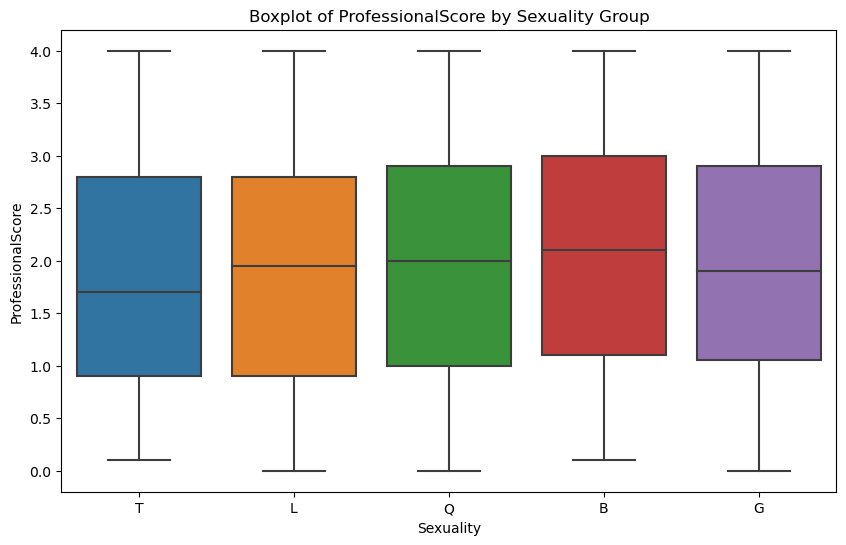

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo boxplot để kiểm tra phân phối của ProfessionalScore theo các nhóm xu hướng tính dục (Sexuality)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sexuality', y='ProfessionalScore', data=df)

# Thêm tiêu đề và nhãn cho biểu đồ
plt.title('Boxplot of ProfessionalScore by Sexuality Group')
plt.xlabel('Sexuality')
plt.ylabel('ProfessionalScore')

# Hiển thị biểu đồ
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13580\743863365.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['RES'] = tmp['Result'].map(dict_map)


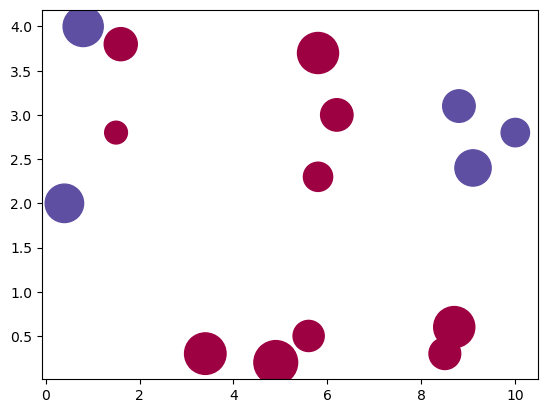

In [21]:
tmp = df.loc[(df['Sexuality'] == 'T') & (df['InterviewScore'] == 'B')]

# Ánh xạ giá trị cho cột Result
dict_map = {
    'NO': 0.0, 'YES': 1.0
}
tmp['RES'] = tmp['Result'].map(dict_map)

# Vẽ đồ thị scatter với kích thước marker theo ExpectedSalary và màu theo kết quả (RES)
plt.scatter(x=tmp['TimeToStudy'], y=tmp['ProfessionalScore'], s=tmp['ExpectedSalary'], c=tmp['RES'], cmap="Spectral")

# Hiển thị biểu đồ
plt.show()


In [22]:
# Hiển thị các giá trị TimeToStudy trong dữ liệu đã lọc
print(tmp[['TimeToStudy', 'ProfessionalScore', 'ExpectedSalary', 'Result']])


     TimeToStudy  ProfessionalScore  ExpectedSalary Result
10           0.4                2.0           764.3    YES
54           4.9                0.2           991.7     NO
119          6.2                3.0           544.6     NO
141          5.8                3.7           872.6     NO
167          8.5                0.3           521.3     NO
227          0.8                4.0           834.3    YES
377          5.6                0.5           502.3     NO
501         10.0                2.8           417.2    YES
685          8.7                0.6           875.1     NO
756          8.8                3.1           547.8    YES
813          1.6                3.8           566.3     NO
894          5.8                2.3           442.4     NO
923          3.4                0.3           891.7     NO
982          9.1                2.4           681.0    YES
996          1.5                2.8           267.6     NO


In [23]:
from sklearn.preprocessing import MaxAbsScaler

# Chọn cột ProfessionalScore để thực hiện scale
scaler = MaxAbsScaler()

# Thực hiện scale
df_scaled = scaler.fit_transform(df[['ProfessionalScore']])

# Tạo DataFrame từ kết quả scale
df['ProfessionalScore_scaled'] = df_scaled

# Scale giá trị 4.5
scaled_value = scaler.transform([[4.5]])

# Hiển thị giá trị đã được scale
print(f"Giá trị 4.5 được scale thành: {scaled_value[0][0]}")


Giá trị 4.5 được scale thành: 1.125


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MaxAbsScaler was fitted with feature names
  warnings.warn(


In [26]:
import pandas as pd

# Tạo bảng crosstab giữa Sexuality và InterviewScore
crosstab_table = pd.crosstab(df['Sexuality'], df['InterviewScore'])

# In bảng crosstab dễ quan sát hơn
print("Bảng Crosstab giữa Sexuality và InterviewScore:\n")
print(crosstab_table)

# Lọc ra các giá trị mà bạn quan tâm (32, 29, 30, 31, 28)
values_of_interest = [32, 29, 30, 31, 28]

# Đếm số lần xuất hiện của các giá trị này trong bảng crosstab
count_values = crosstab_table.isin(values_of_interest).sum().sum()

# Hiển thị số lần xuất hiện của từng giá trị
for value in values_of_interest:
    count = (crosstab_table == value).sum().sum()
    print(f"Giá trị {value} xuất hiện {count} lần")



Bảng Crosstab giữa Sexuality và InterviewScore:

InterviewScore   A   B    C    D   F
Sexuality                           
B                5  24   30   42  32
G                8  19   40   46  34
L                9  37   64   54  38
Q               16  65  126  122  84
T                6  15   31   32  21
Giá trị 32 xuất hiện 2 lần
Giá trị 29 xuất hiện 0 lần
Giá trị 30 xuất hiện 1 lần
Giá trị 31 xuất hiện 1 lần
Giá trị 28 xuất hiện 0 lần


In [27]:
import pandas as pd

# Tạo bảng crosstab giữa Sexuality và InterviewScore
crosstab_table = pd.crosstab(df['Sexuality'], df['InterviewScore'])

# In bảng crosstab dễ quan sát hơn
print("Bảng Crosstab giữa Sexuality và InterviewScore:\n")
print(crosstab_table)

# Tìm giá trị yếu vị (giá trị xuất hiện nhiều nhất trong bảng crosstab)
mode_value = crosstab_table.values.max()

# Tìm và in các vị trí có giá trị yếu vị
mode_positions = (crosstab_table == mode_value)
print(f"Giá trị yếu vị trong bảng Crosstab là: {mode_value}")
print("Các vị trí chứa giá trị yếu vị:\n", mode_positions)


Bảng Crosstab giữa Sexuality và InterviewScore:

InterviewScore   A   B    C    D   F
Sexuality                           
B                5  24   30   42  32
G                8  19   40   46  34
L                9  37   64   54  38
Q               16  65  126  122  84
T                6  15   31   32  21
Giá trị yếu vị trong bảng Crosstab là: 126
Các vị trí chứa giá trị yếu vị:
 InterviewScore      A      B      C      D      F
Sexuality                                        
B               False  False  False  False  False
G               False  False  False  False  False
L               False  False  False  False  False
Q               False  False   True  False  False
T               False  False  False  False  False


In [30]:
import pandas as pd

# Giả sử df là DataFrame chứa dữ liệu của bạn
# Tạo một DataFrame mẫu để minh họa


# Tạo bảng Crosstab giữa xu hướng tính dục và điểm phỏng vấn
crosstab = pd.crosstab(df['Sexual_Orientation'], df['Interview_Score'])

# Tìm giá trị yếu vị (mode) trong bảng Crosstab
mode_value = crosstab.values.flatten().max()

print("Giá trị yếu vị trong bảng Crosstab là:", mode_value)


Giá trị yếu vị trong bảng Crosstab là: 2


In [31]:
import pandas as pd

# Giả sử df là DataFrame chứa dữ liệu của bạn
# Tạo bảng Crosstab giữa xu hướng tính dục và điểm phỏng vấn
crosstab = pd.crosstab(df['Sexual_Orientation'], df['Interview_Score'])

# Tìm giá trị yếu vị (mode) trong bảng Crosstab
mode_value = crosstab.values.max()

# In giá trị yếu vị và các vị trí của nó trong bảng
print(f"Giá trị yếu vị trong bảng Crosstab là: {mode_value}")

# Tìm các vị trí chứa giá trị yếu vị
positions = (crosstab == mode_value)

# In các vị trí chứa giá trị yếu vị
print("Các vị trí chứa giá trị yếu vị:")
print(crosstab[positions])


Giá trị yếu vị trong bảng Crosstab là: 2
Các vị trí chứa giá trị yếu vị:
Interview_Score     28  29  30  31   32
Sexual_Orientation                     
A                  NaN NaN NaN NaN  2.0
B                  NaN NaN NaN NaN  NaN
C                  NaN NaN NaN NaN  NaN


In [36]:
import pandas as pd
import numpy as np

# Tạo bảng Crosstab giữa xu hướng tính dục và điểm phỏng vấn
crosstab = pd.crosstab(df['Sexual_Orientation'], df['Interview_Score'])

# Tìm giá trị yếu vị (mode) và số lần nó xuất hiện trong bảng Crosstab
mode_value = crosstab.values.flatten().max()
mode_indices = list(zip(*np.where(crosstab.values == mode_value)))

print("Giá trị yếu vị và số lần nó xuất hiện trong bảng Crosstab là:")

# In các vị trí của giá trị yếu vị
for row_index, col_index in mode_indices:
    sexual_orientation = crosstab.index[row_index]
    interview_score = crosstab.columns[col_index]
    print(f"Xu hướng tính dục: {sexual_orientation}, Điểm phỏng vấn: {interview_score}, Số lần xuất hiện: {mode_value}")


Giá trị yếu vị và số lần nó xuất hiện trong bảng Crosstab là:
Xu hướng tính dục: A, Điểm phỏng vấn: 32, Số lần xuất hiện: 2


In [38]:
import matplotlib.pyplot as plt

# Thay đổi 'TimeToStudy' thành tên cột thực tế
plt.figure(figsize=(8, 6))
plt.hist(df['TimeToStudy'], bins=5, edgecolor='black')

# Thêm tiêu đề và nhãn cho trục
plt.title('Phân phối dữ liệu của thời gian dành cho việc học')
plt.xlabel('Thời gian dành cho việc học (hours)')
plt.ylabel('Số lần xuất hiện')

# Hiển thị biểu đồ
plt.show()


KeyError: 'TimeToStudy'

<Figure size 800x600 with 0 Axes>

In [39]:
# Kiểm tra tên các cột trong DataFrame
print(df.columns)


Index(['Sexual_Orientation', 'Interview_Score'], dtype='object')


In [40]:
# Giả sử bạn đã có df với cột ProfessionalScore
# Tìm giá trị min và max của cột ProfessionalScore
min_value = df['ProfessionalScore'].min()
max_value = df['ProfessionalScore'].max()

# Giá trị đã được scale là 0.65
scaled_value = 0.65

# Tính giá trị ban đầu (original_value)
original_value = min_value + (scaled_value * (max_value - min_value))

# Hiển thị giá trị ban đầu
print(f"Giá trị ban đầu của 0.65 sau khi scale là: {original_value}")


KeyError: 'ProfessionalScore'